In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
body = pd.read_csv("data/body.tsv", sep='\t')
body.head()
df = body.head(10000)

In [6]:
G = nx.from_pandas_edgelist(df, source="SOURCE_SUBREDDIT", target="TARGET_SUBREDDIT", create_using=nx.DiGraph(), edge_attr=("TIMESTAMP", "LINK_SENTIMENT"))


In [7]:
layout = nx.spring_layout(G)

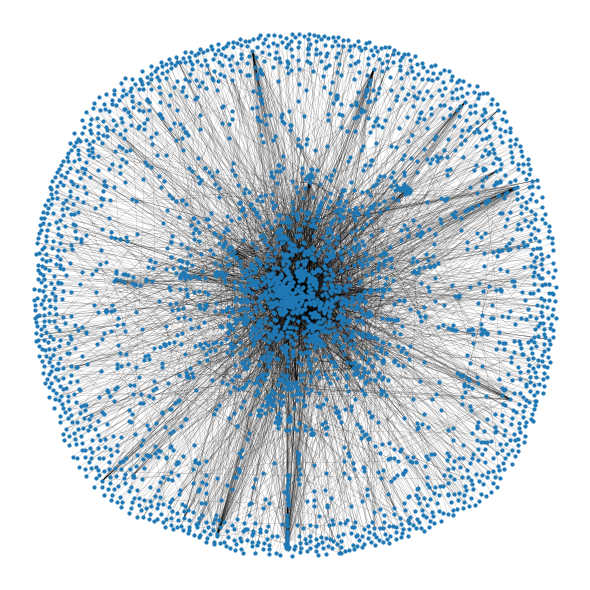

In [8]:
plt.figure(figsize=(8,8))
nx.draw(G, pos=layout, node_size=10, arrows=False, width = 0.1)

Configuration model

In [9]:
degree_seq = [d for n,d in G.degree()]

in_degree = np.array([x[1] for x in G.in_degree()])
out_degree = np.array([x[1] for x in G.out_degree()])

In [10]:
G_config = nx.configuration_model(degree_seq)

In [11]:
layout = nx.spring_layout(G_config)

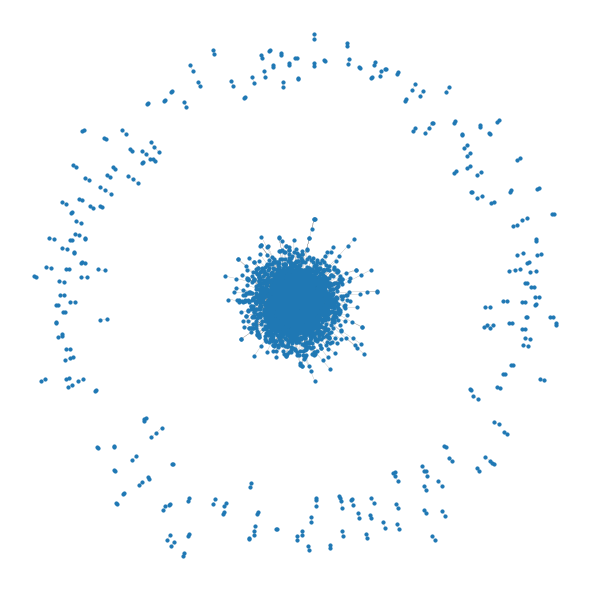

In [12]:
plt.figure(figsize=(8,8))
nx.draw(G_config, pos=layout, node_size=10, arrows=False, width = 0.1)

In [13]:
G_directed_config = nx.directed_configuration_model(in_degree,out_degree)

In [14]:
layout = nx.spring_layout(G_directed_config)

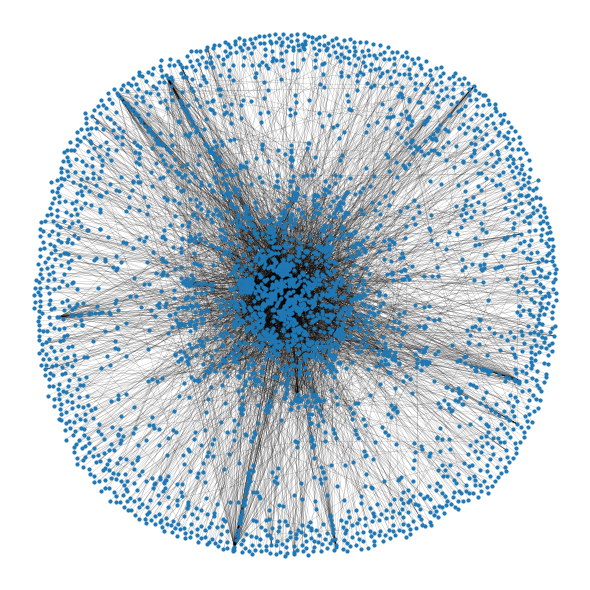

In [15]:
plt.figure(figsize=(8,8))
nx.draw(G_directed_config, pos=layout, node_size=10, arrows=False, width = 0.1)